<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Inclass - Lab File 4 <br>(Week 2 - Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

## Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

UCI: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
4. **[Gradient Descent](#gd)**
5. **[Grid Search](#gs)**

### Let's begin with some hands-on practice exercises

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Read the Car MPG dataset and display the first 5 rows </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
df=pd.read_csv("/content/Car-mpg- Dataset-1.csv")
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check for the shape and data types. Are the data types shown in the results correct?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.shape

(398, 10)

In [4]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Change the data types if there are any columns that have been erroneously identified?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Hint:
1. Check if they are any non-numeric values present in the HP column
2. If yes, replace them with the median or best suitable value

In [5]:
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
df = df[df['hp'] != "?"]
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [7]:
df['hp']=df['hp'].astype(int)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from collections import Counter

redundant_values = {}
for column in df.columns:
    duplicates = df[df.duplicated(column, keep=False)][column].unique()
    if len(duplicates) > 0:
        redundant_values[column] = list(duplicates)

# Print the result
print("Redundant values in each column:")
keys=redundant_values.keys()
values=[]
for i in redundant_values.values():
  values.append(len(i))

result_dict = dict(zip(keys, values))
result_dict

Redundant values in each column:


{'mpg': 55,
 'cyl': 5,
 'disp': 53,
 'hp': 58,
 'wt': 36,
 'acc': 66,
 'yr': 13,
 'origin': 3,
 'car_type': 2,
 'car_name': 56}

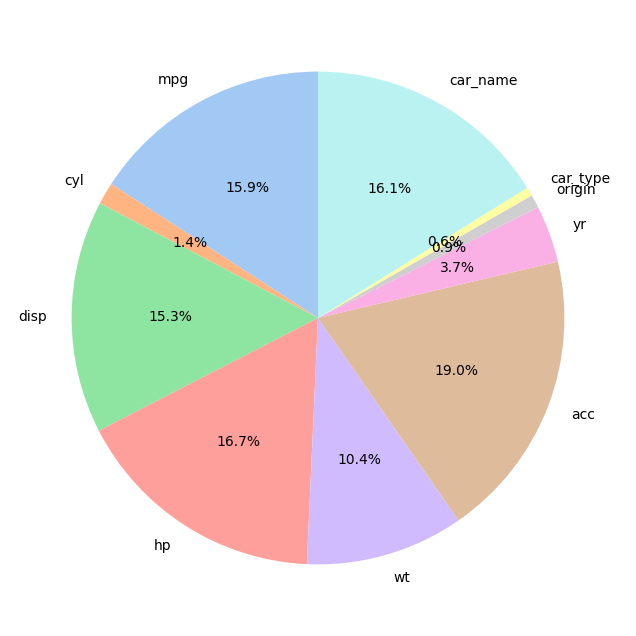

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(result_dict.values(), labels=result_dict.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [11]:
df["mpg"].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [12]:
df["cyl"].unique()

array([8, 4, 6, 3, 5])

In [13]:
df["origin"].unique()

array([1, 3, 2])

In [14]:
df["yr"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [15]:

df["car_type"].unique()

array([0, 1])

In [16]:
df_encoded = pd.get_dummies(df, columns=['cyl'], drop_first=True)
print("\nDataFrame after Dummy Encoding:")
df_encoded


DataFrame after Dummy Encoding:


,mpg,disp,hp,wt,acc,yr,origin,car_type,car_name,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,1,0,buick skylark 320,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,1,0,plymouth satellite,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,1,0,amc rebel sst,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,1,0,ford torino,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82,1,1,ford mustang gl,1,0,0,0
394,44.0,97.0,52,2130,24.6,82,2,1,vw pickup,1,0,0,0
395,32.0,135.0,84,2295,11.6,82,1,1,dodge rampage,1,0,0,0
396,28.0,120.0,79,2625,18.6,82,1,1,ford ranger,1,0,0,0


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a full model using least squares regression via SKLEARN. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
from sklearn.preprocessing import StandardScaler

df_removed = df_encoded.drop("car_name", axis=1)
df_removed = df_removed.drop("mpg", axis=1)



scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_removed), columns=df_removed.columns)

In [18]:
X=df_encoded.drop("car_name", axis=1)
Y=df_encoded["mpg"]
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)
lr=LinearRegression()
model=lr.fit(X_train,Y_train)

In [20]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [21]:
train_error=mean_squared_error(Y_train,Y_pred_train,squared=False)
train_error

6.854794283379349e-15

In [22]:
test_error=mean_squared_error(Y_test,Y_pred_test,squared=False)
test_error

7.61295788314393e-15

THE MODEL IS NOT OVERFITTING

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
Y_pred_train=model.predict(X_train)
Y_pred_train-Y_train

259    0.000000e+00
289   -7.105427e-15
108    0.000000e+00
206    3.552714e-15
99     0.000000e+00
           ...     
205    3.552714e-15
257    0.000000e+00
73    -1.065814e-14
237    7.105427e-15
38    -1.065814e-14
Name: mpg, Length: 294, dtype: float64

In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(Y_pred_train-Y_train, add_constant(X_train))

(186.98563360522328,
 1.5663721274851722e-33,
 44.79428192094901,
 1.691035225930597e-55)

p_value is > hence failed to reject null  hypothesis=> EQIVARIANCE EXCISTS

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build Linear Regression from SKLEARN and SGD model with all the features by scalling. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained from LR model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df.skew()

<ipython-input-37-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


mpg         0.457092
cyl         0.508109
disp        0.701669
hp          1.087326
wt          0.519586
acc         0.291587
yr          0.019688
origin      0.915185
car_type   -0.102567
dtype: float64

In [38]:
from sklearn.preprocessing import RobustScaler

In [42]:
df_encoded.head()

,mpg,disp,hp,wt,acc,yr,origin,car_type,car_name,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,1,0,buick skylark 320,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,1,0,plymouth satellite,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,1,0,amc rebel sst,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,1,0,ford torino,0,0,0,1


In [43]:
X=df_encoded.drop("car_name", axis=1)
Y=df_encoded["mpg"]
scaler = RobustScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)
model=lr.fit(X_train,Y_train)

<Axes: >

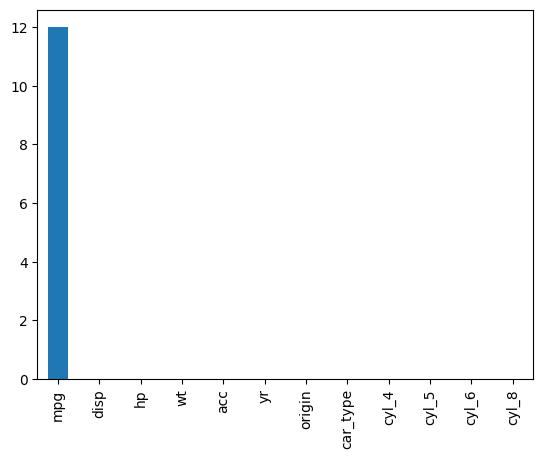

In [57]:
sgdr = SGDRegressor()
model2=sgdr.fit(X_train,Y_train)
pd.Series(model.coef_,index=model.feature_names_in_).plot(kind="bar")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Compare the test RMSE score of SGD model and SKLEARN LR model.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, Y_train.ravel())
y_pred = sgd_regressor.predict(X_test)

In [66]:
y_pred = sgd_regressor.predict(X_train)
mse = mean_squared_error(Y_train, y_pred)
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Root Mean Squared Error: 0.38733036486062344


In [67]:
lr=LinearRegression()
model=lr.fit(X_train,Y_train)

In [70]:
Y_pred=model.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Root Mean Squared Error: 5.9926583074676714e-15


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10.Build the SGD model with a Learning rate of 0.01 and compare the results with the previous SGD and LR models. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
sgd_regressor = SGDRegressor(eta0=0.01)
sgd_regressor.fit(X_train, Y_train.ravel())
y_pred = sgd_regressor.predict(X_train)

In [75]:
mse = mean_squared_error(Y_train, y_pred)
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Root Mean Squared Error: 0.39567222173899463


<a id="gs"> </a>
## 4. Grid Search

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build a SGD full model. Select the optimal alpha value for GSD<br><br>Consider the values: alpha : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
sgd_regressor = SGDRegressor()
grid_search = GridSearchCV(sgd_regressor, param_grid)
grid_search.fit(X_train, Y_train.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]})

In [78]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [80]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (Best Model): {mse}")

Mean Squared Error (Best Model): 0.2076796312963503


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Determine the optimal value of alpha and l1_ratio for SGD model. Consider the following list of values:<br><br> alpha : [0.0001,0.001,0.005,0.01,0.05,0.01,0.1,0.5,1]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
}

sgd_regressor = SGDRegressor()
grid_search = GridSearchCV(sgd_regressor, param_grid)
grid_search.fit(X_train, Y_train.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1],
                         'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                      0.85, 0.9]})

In [82]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [83]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (Best Model): {mse}")

Mean Squared Error (Best Model): 0.20934933354253726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Determine the optimal value of alpha and l1_ratio for SGD model with help of Randomized Search CV. Consider the following list of values:<br><br> alpha : [0.0001,0.001,0.005,0.01,0.05,0.01,0.1,0.5,1]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
param_grid = {
    'alpha': [0.0001,0.001,0.005,0.01,0.05,0.01,0.1,0.5,1],
    'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
}

sgd_regressor = SGDRegressor()
grid_search = GridSearchCV(sgd_regressor, param_grid)
grid_search.fit(X_train, Y_train.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.01, 0.1,
                                   0.5, 1],
                         'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                      0.85, 0.9]})

In [85]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (Best Model): {mse}")

Mean Squared Error (Best Model): 0.1993774355477535
